![](https://storage.googleapis.com/quest_editor_uploads/9aMWaGGxxMBn605YuI1yAqxwof55Adxw.jpg)

Vous utiliserez les données ci-dessous. Créez un dataframe à partir de ces liens :       
- https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv
- https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv

In [4]:
import pandas as pd

url_main = 'https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv'
url_opinion = 'https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv'

df_main = pd.read_csv(url_main)
df_opinion = pd.read_csv(url_opinion)

print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0  2018-01-01                 12                  8                 61   
1  2018-01-02                 13                  6                 26   
2  2018-01-03                 15                 10                 40   
3  2018-01-04                 14                 11                 45   
4  2018-01-05                 12                  7                 21   

   TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0                      9                  11                      8   
1                      8                  12                     13   
2                     11                  12                     10   
3                     14                  14                     11   
4                     10                  11                      8   

   PRECIP_TOTAL_DAY_MM  HUMIDITY_MAX_PERCENT  VISIBILITY_AVG_KM  \
0                  8.9                    79              9.5

Faite une jointure entre les deux dataframes sur la base de la colonne de date. Le dataframe opinion sera le dataframe de gauche.

In [5]:
df_opinion.rename(columns={'date': 'DATE'}, inplace=True)
df_merged = pd.merge(df_opinion, df_main, on='DATE', how='left')
print(df_merged.head())

         DATE  WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR OPINION  \
0  2018-01-01                   113              0         3      5.1     bad   
1  2018-03-12                   119              0         2      8.8     bad   
2  2018-03-09                   116              0         3     10.2     bad   
3  2018-10-07                   122              0         1      5.6     bad   
4  2018-06-18                   119              0         1     12.9     bad   

   MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0                 12                  8                 61   
1                 11                  9                 40   
2                 14                  8                 27   
3                 16                 12                 33   
4                 20                 16                 11   

   TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0                      9                  11                      8  

Des valeurs sans manquantes après la jointure. Identifiez les colonnes et les lignes concernées et créer un dataframe qui ne contient que les lignes ayant des valeurs manquantes

In [4]:
missing_values = df_merged[df_merged.isnull().any(axis=1)]

print("Colonnes avec des valeurs manquantes :")
print(missing_values.columns[missing_values.isnull().any()].tolist())

print("\nLignes avec des valeurs manquantes :")
print(missing_values)

df_missing = missing_values

print("\nDataframe avec des valeurs manquantes :")
print(df_missing)

Colonnes avec des valeurs manquantes :
[]

Lignes avec des valeurs manquantes :
Empty DataFrame
Columns: [DATE, WEATHER_CODE_EVENING, TOTAL_SNOW_MM, UV_INDEX, SUNHOUR, OPINION, MAX_TEMPERATURE_C, MIN_TEMPERATURE_C, WINDSPEED_MAX_KMH, TEMPERATURE_MORNING_C, TEMPERATURE_NOON_C, TEMPERATURE_EVENING_C, PRECIP_TOTAL_DAY_MM, HUMIDITY_MAX_PERCENT, VISIBILITY_AVG_KM, PRESSURE_MAX_MB, CLOUDCOVER_AVG_PERCENT, HEATINDEX_MAX_C, DEWPOINT_MAX_C, WINDTEMP_MAX_C]
Index: []

Dataframe avec des valeurs manquantes :
Empty DataFrame
Columns: [DATE, WEATHER_CODE_EVENING, TOTAL_SNOW_MM, UV_INDEX, SUNHOUR, OPINION, MAX_TEMPERATURE_C, MIN_TEMPERATURE_C, WINDSPEED_MAX_KMH, TEMPERATURE_MORNING_C, TEMPERATURE_NOON_C, TEMPERATURE_EVENING_C, PRECIP_TOTAL_DAY_MM, HUMIDITY_MAX_PERCENT, VISIBILITY_AVG_KM, PRESSURE_MAX_MB, CLOUDCOVER_AVG_PERCENT, HEATINDEX_MAX_C, DEWPOINT_MAX_C, WINDTEMP_MAX_C]
Index: []


Créer une fonction qui va prédire la valeur de la colonne SUNHOUR sur la base :    
1. Uniquement des colonnes numériques dont la valeur absolue de la corrélation de Pearson est d'au moins **0.5**
2. Sur la base de toutes les colonnes numériques

Vous aurez au préalable splitter les données entre un train et un test split

Vous utiliserez les modèles ci-dessous :
- LinearSVR
- SGDRegressor
- LinearRegression
- KNeighborsRegressor

Faites la moyenne entre le score du train et du test split pour chaque modèle. Pour quelles données et avec quel modèle obtient-on la valeur la plus élevée ?

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

df = df_merged

# Séparer les colonnes numériques
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculer la corrélation de Pearson
correlation_matrix = df[numeric_cols].corr()
correlated_features = correlation_matrix['SUNHOUR'][abs(correlation_matrix['SUNHOUR']) >= 0.5].index.tolist()
correlated_features.remove('SUNHOUR')

# Diviser les données en ensembles d'entraînement et de test
X_all = df[numeric_cols].drop(columns=['SUNHOUR'])
y = df['SUNHOUR']
X_train_all, X_test_all, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

X_corr = df[correlated_features]
X_train_corr, X_test_corr, _, _ = train_test_split(X_corr, y, test_size=0.2, random_state=42)

# Définir une fonction pour entraîner et évaluer les modèles
def evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        'LinearSVR': LinearSVR(),
        'SGDRegressor': SGDRegressor(),
        'LinearRegression': LinearRegression(),
        'KNeighborsRegressor': KNeighborsRegressor()
    }
    
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        train_score = r2_score(y_train, model.predict(X_train))
        test_score = r2_score(y_test, model.predict(X_test))
        results[name] = (train_score + test_score) / 2
    
    return results

# Entraîner et évaluer les modèles sur les deux ensembles de données
results_all = evaluate_models(X_train_all, X_test_all, y_train, y_test)
results_corr = evaluate_models(X_train_corr, X_test_corr, y_train, y_test)

# Identifier le modèle et les données qui donnent la valeur la plus élevée
best_model_all = max(results_all, key=results_all.get)
best_model_corr = max(results_corr, key=results_corr.get)

print("Meilleur modèle avec toutes les colonnes numériques :")
print(f"Modèle : {best_model_all}, Score : {results_all[best_model_all]}")

print("\nMeilleur modèle avec les colonnes sélectionnées :")
print(f"Modèle : {best_model_corr}, Score : {results_corr[best_model_corr]}")

/Users/abedja/IaPM_WcS/env_wcs/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Meilleur modèle avec toutes les colonnes numériques :
Modèle : KNeighborsRegressor, Score : 0.7370194580370106

Meilleur modèle avec les colonnes sélectionnées :
Modèle : KNeighborsRegressor, Score : 0.7044124060420913


/Users/abedja/IaPM_WcS/env_wcs/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Effectuez une régression polynomiale sur les données :     
1. Uniquement des colonnes numériques dont la valeur absolue de la corrélation de Pearson est d'au moins **0.5**
2. Sur la base de toutes les colonnes numériques

Le score de la régression polynomiale est t'il meilleur que celui des autres modèles ?

In [8]:
from sklearn.preprocessing import PolynomialFeatures


df = df_merged

def polynomial_regression(X_train, X_test, y_train, y_test, degree=2):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    train_score = r2_score(y_train, model.predict(X_train_poly))
    test_score = r2_score(y_test, model.predict(X_test_poly))
    
    return (train_score + test_score) / 2

poly_score_all = polynomial_regression(X_train_all, X_test_all, y_train, y_test)
poly_score_corr = polynomial_regression(X_train_corr, X_test_corr, y_train, y_test)

results_all = evaluate_models(X_train_all, X_test_all, y_train, y_test)
results_corr = evaluate_models(X_train_corr, X_test_corr, y_train, y_test)

best_model_all = max(results_all, key=results_all.get)
best_model_corr = max(results_corr, key=results_corr.get)

print("\nScore de la régression polynomiale avec toutes les colonnes numériques :")
print(f"Score : {poly_score_all}")

print("\nScore de la régression polynomiale avec les colonnes sélectionnées :")
print(f"Score : {poly_score_corr}")

/Users/abedja/IaPM_WcS/env_wcs/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Score de la régression polynomiale avec toutes les colonnes numériques :
Score : 0.6412183081092633

Score de la régression polynomiale avec les colonnes sélectionnées :
Score : 0.7207059221700489


/Users/abedja/IaPM_WcS/env_wcs/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Remplissez les valeurs manquantes du dataframe avec les prédictions du modèle le plus performant. Avant, vous ajouterez une colonne qui permet de faire la différence entre les valeurs réelles et les valeurs prédites (celle qui étaient manquantes). Enfin, vous créerez une colonne qui contient les prédiction du modèle sur l'ensemble des valeurs.


In [10]:
def polynomial_regression(X_train, X_test, y_train, y_test, degree=2):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    train_score = r2_score(y_train, model.predict(X_train_poly))
    test_score = r2_score(y_test, model.predict(X_test_poly))
    
    return (train_score + test_score) / 2, model, poly

# Effectuer une régression polynomiale sur les deux ensembles de données
poly_score_all, poly_model_all, poly_all = polynomial_regression(X_train_all, X_test_all, y_train, y_test)
poly_score_corr, poly_model_corr, poly_corr = polynomial_regression(X_train_corr, X_test_corr, y_train, y_test)

# Comparer les scores de la régression polynomiale avec ceux des autres modèles
results_all = evaluate_models(X_train_all, X_test_all, y_train, y_test)
results_corr = evaluate_models(X_train_corr, X_test_corr, y_train, y_test)

best_model_all = max(results_all, key=results_all.get)
best_model_corr = max(results_corr, key=results_corr.get)

# Identifier le modèle le plus performant
best_model_name = best_model_all if results_all[best_model_all] > results_corr[best_model_corr] else best_model_corr
best_model = poly_model_all if poly_score_all > poly_score_corr else poly_model_corr
best_poly = poly_all if poly_score_all > poly_score_corr else poly_corr

# Entraîner le modèle le plus performant sur l'ensemble des données disponibles
X_full = df[numeric_cols].drop(columns=['SUNHOUR'])
y_full = df['SUNHOUR']
X_full_poly = best_poly.fit_transform(X_full)
best_model.fit(X_full_poly, y_full)

# Prédire les valeurs manquantes de la colonne SUNHOUR
missing_indices = df['SUNHOUR'].isnull()
X_missing = X_full[missing_indices]

if not X_missing.empty:
    X_missing_poly = best_poly.transform(X_missing)
    predictions = best_model.predict(X_missing_poly)
    df.loc[missing_indices, 'SUNHOUR_PREDICTED'] = predictions
    df['DIFFERENCE'] = df['SUNHOUR'] - df['SUNHOUR_PREDICTED']
    df['SUNHOUR'].fillna(df['SUNHOUR_PREDICTED'], inplace=True)

# Ajouter une colonne contenant les prédictions du modèle sur l'ensemble des valeurs
X_full_poly = best_poly.transform(X_full)
df['SUNHOUR_PREDICTIONS'] = best_model.predict(X_full_poly)

print(df.head())

/Users/abedja/IaPM_WcS/env_wcs/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/abedja/IaPM_WcS/env_wcs/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


         DATE  WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR OPINION  \
0  2018-01-01                   113              0         3      5.1     bad   
1  2018-03-12                   119              0         2      8.8     bad   
2  2018-03-09                   116              0         3     10.2     bad   
3  2018-10-07                   122              0         1      5.6     bad   
4  2018-06-18                   119              0         1     12.9     bad   

   MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0                 12                  8                 61   
1                 11                  9                 40   
2                 14                  8                 27   
3                 16                 12                 33   
4                 20                 16                 11   

   TEMPERATURE_MORNING_C  ...  TEMPERATURE_EVENING_C  PRECIP_TOTAL_DAY_MM  \
0                      9  ...                      8           

Créez un scatterplot avec en X les dates et en y la SUNHOUR. Vous le colorierez pour obtenir un résultat qui ressemble à l'image ci-dessous dans lequel sont supperposés les valeurs réelles (uniquement) et les valeurs prédites. Ajoutez également une légende pour identifier les valeurs réelles et les valeurs prédites (dans notre cas les valeurs prédites sont en bleu et les valeurs réelles en orange).


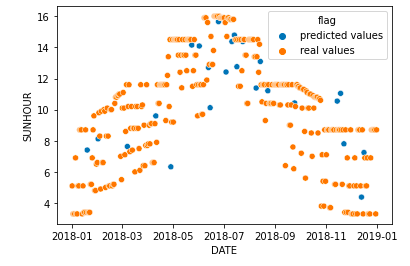

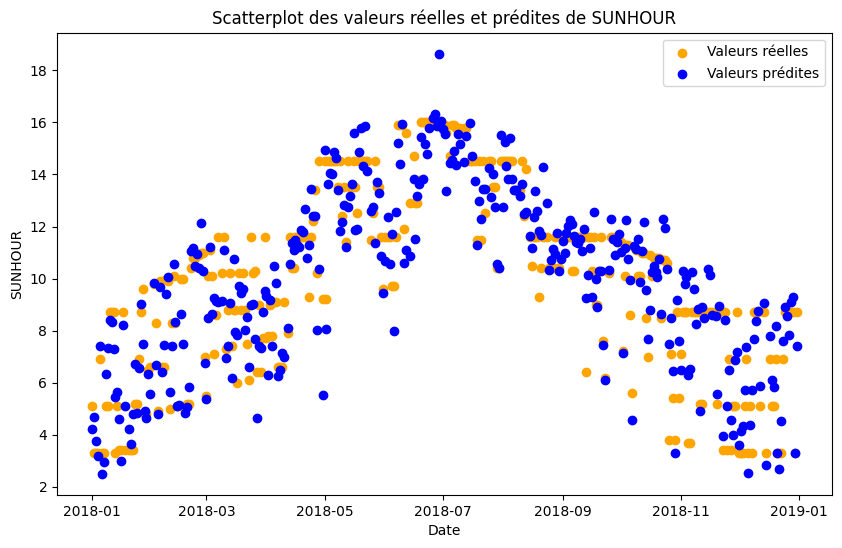

In [11]:
import matplotlib.pyplot as plt

df['DATE'] = pd.to_datetime(df['DATE'])

plt.figure(figsize=(10, 6))
plt.scatter(df['DATE'], df['SUNHOUR'], color='orange', label='Valeurs réelles')
plt.scatter(df['DATE'], df['SUNHOUR_PREDICTIONS'], color='blue', label='Valeurs prédites')
plt.legend()
plt.title('Scatterplot des valeurs réelles et prédites de SUNHOUR')
plt.xlabel('Date')
plt.ylabel('SUNHOUR')
plt.show()

Que signifie la superposition des cercles dans le scatterplot ?

Cela signifie que pour certaines dates, les valeurs réelles et prédites de SUNHOUR sont très similaires ou identiques.